In [84]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [85]:
age=np.array([16,24,31,29,40,33,18,15,19,21,29,31,24,20,34,22,32,36,37])
job=np.array([0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1])

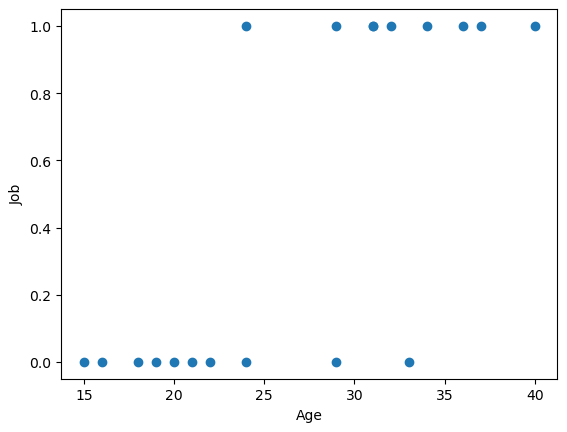

In [86]:
plt.scatter(age, job)
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

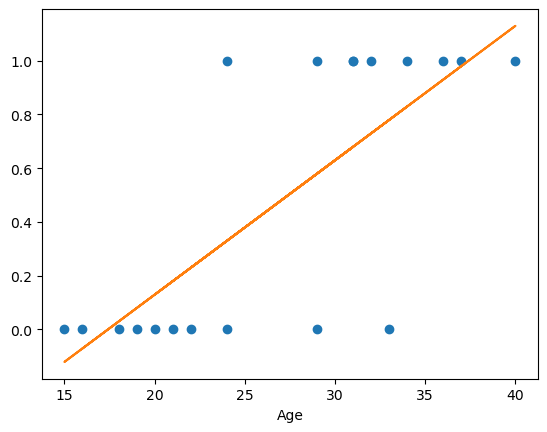

In [87]:
m,c = np.polyfit(age, job, 1)
plt.xlabel('Age')
plt.plot(age, job, 'o')
plt.plot(age, m*age+c)

In [88]:
data = pd.DataFrame(pd.read_csv('Bank.csv')) #load the Bank dataset
data

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...
41183,59,222,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,-3.4,92.431,-26.9,0.742,5017.5,0


In [89]:
data.isnull().sum() #check for missing values

age               0
duration          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [90]:
#select data for dependent variable and independent variable
x = data.iloc[:, :7] 
y = data.iloc[:, 7]

In [91]:
print('x shape: ', x.shape)
print('y shape: ',y.shape)

x shape:  (41188, 7)
y shape:  (41188,)


In [92]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [93]:
#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [94]:
#check how many data points are in the training and testing data
len(x_train), len(x_test), len(y_train), len(y_test)

(32950, 8238, 32950, 8238)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [96]:
#creating and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [97]:
model.score(x_train, y_train)

0.9048254931714719

In [98]:
y_pred = model.predict(x_test)

In [99]:
y_pred_prob = model.predict_proba(x_test)

In [100]:
print(y_pred_prob)

[[0.98854028 0.01145972]
 [0.99115392 0.00884608]
 [0.97866402 0.02133598]
 ...
 [0.9464979  0.0535021 ]
 [0.99197127 0.00802873]
 [0.58357551 0.41642449]]


In [101]:
y_pred_prob = model.predict_proba(x_test)[:,1]

In [102]:
y_pred_prob

array([0.01145972, 0.00884608, 0.02133598, ..., 0.0535021 , 0.00802873,
       0.41642449])

In [103]:
confusion_matrix(y_test, y_pred)

array([[7097,  185],
       [ 636,  320]], dtype=int64)

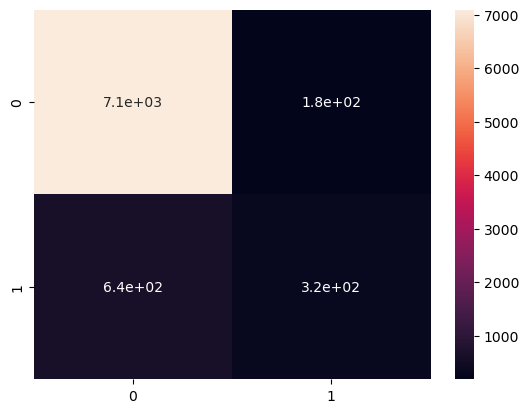

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

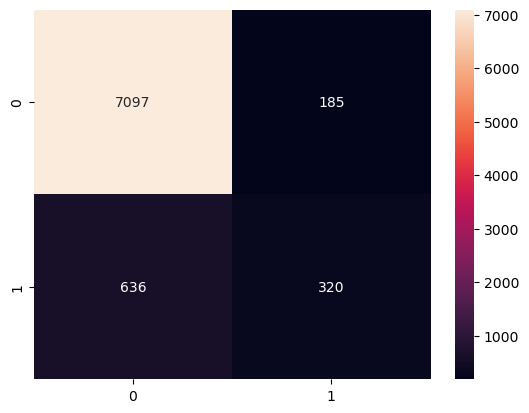

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
#to see the values in real numbers
plt.show()

# Evaluation Matrix

In [119]:
accuracy_score(y_test, y_pred)

0.9003398883224083

In [120]:
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7282
           1       0.63      0.33      0.44       956

    accuracy                           0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238



In [121]:
fpr, tpr,_ = roc_curve(y_test, y_pred_prob) #we are goinf to produce the ROC curve

Text(0.5, 1.0, 'ROC curve')

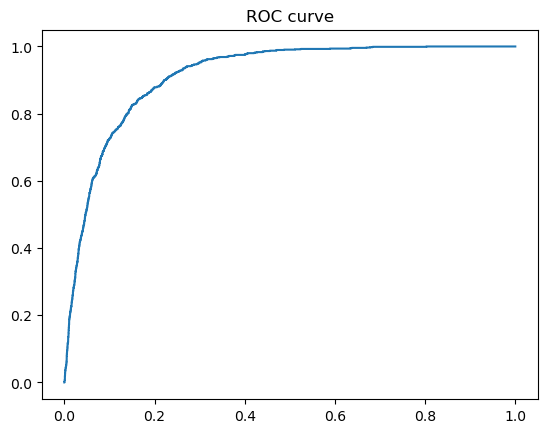

In [122]:
plt.plot(fpr, tpr)
plt.title('ROC curve')

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
roc_auc_score(y_test, y_pred_prob)

0.9143506255465704

In [125]:
arr = np.array([28,339,-1.7,94.055,-39.8,0.729,4991.6]).reshape(1,7)

In [126]:
result=pd.DataFrame(data=[y_test.values,y_pred],index=['Actual','Predicted'])

In [127]:
result.transpose()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
8233,0,0
8234,0,0
8235,0,0
8236,0,0


# To check how many values are correct

In [129]:
correct_sum=[]
pred=model.predict(x_test)
correct=np.sum(pred==y_test)
correct_sum.append(correct)

In [130]:
correct_sum

[7417]

In [131]:
len(x_test)

8238